In [42]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [43]:
import numpy as np
import pandas as pd

In [44]:
import datetime as dt

In [87]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect,desc
from flask import Flask, jsonify

In [88]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
engine

Engine(sqlite:///Resources/hawaii.sqlite)

In [89]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)
Base

sqlalchemy.ext.automap.Base

In [90]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [91]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [92]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [93]:

inspector = inspect(engine)

inspector.get_table_names()

columns = inspector.get_columns('measurement')

for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [94]:
first_Measurement = session.query(Measurement).first()
first_Measurement.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x224be8650f0>,
 'prcp': 0.08,
 'station': 'USC00519397',
 'tobs': 65.0,
 'date': '2010-01-01',
 'id': 1}

In [106]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
last_date = session.query(func.max(Measurement.date)).all()

last_date

last_year_precipitation = dt.date(2017, 8, 23) - dt.timedelta(days=365)

last_year_precipitation

tweleve_months_precipitation= session.query(Measurement.date,Measurement.prcp).filter(Measurement.date > Last_Year_Observation).all()
tweleve_months_precipitation

[('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06', 0.0),
 ('2016-10-07', 0.0),
 ('2016-10-08',

In [96]:
df = pd.DataFrame(tweleve_months_precipitation)

df.columns =  tweleve_months_precipitation[0].keys()

df.set_index('date',inplace = True)

df_sorted = df.sort_values('date')

df_sorted.head(10)

,prcp
date,
2016-08-25,0.08
2016-08-25,0.00
2016-08-25,0.06
2016-08-25,0.00
2016-08-25,0.08
2016-08-25,0.11
2016-08-25,0.21
2016-08-26,0.00
2016-08-26,0.00


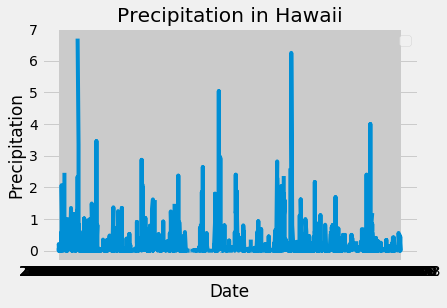

In [97]:
# Use Pandas Plotting with Matplotlib to plot the data
plt.title('Precipitation in Hawaii')
plt.xlabel('Date')
plt.ylabel('Precipitation')
plt.legend(["Precipitation"],loc="best")

plt.plot(df_sorted)
plt.show()

In [98]:
# Use Pandas to calcualte the summary statistics for the precipitation data
summary_stats = df_sorted.describe()

summary_stats

,prcp
count,2009.000000
mean,0.172344
std,0.452818
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [99]:
# Design a query to show how many stations are available in this dataset?
first_row_station = session.query(Station).first()
first_row_station.__dict__

results_station = session.query(Station.latitude,Station.longitude,Station.id,Station.elevation,Station.station,Station.name).all()

df_stations = pd.DataFrame(results_station)

df_stations.head()

stations = session.query(Station.station).count()
stations

9

In [100]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
active_stations=session.query(Station.station,func.count(Measurement.tobs)).filter(Station.station == Measurement.station).\
group_by(Station.station).order_by(desc(func.count(Measurement.tobs))).all()
active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [101]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
session.query(func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs)).filter(Station.station == active_stations[0][0]).all()

[(53.0, 87.0, 73.09795396419437)]

In [102]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
highest_observations= session.query(Measurement.date,Measurement.tobs).filter(Measurement.date > last_year_precipitation).\
filter(Station.station == active_stations[0][0]).all()

highest_observations_frame=pd.DataFrame(highest_observations)
highest_observations_frame.head()



,date,tobs
0,2016-08-25,80.0
1,2016-08-26,79.0
2,2016-08-27,77.0
3,2016-08-28,78.0
4,2016-08-29,78.0


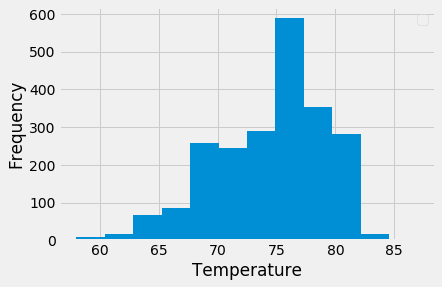

In [103]:
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.legend(["tobs"])
plt.hist(highest_observations_frame['tobs'],bins=12)
plt.show()